## Student Performance Indicator

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [21]:
df =  pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [22]:
df.shape

(1000, 8)

### 2.2 Dataset information


- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [23]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [24]:
df.duplicated().sum()

np.int64(0)

#### There are no duplicates  values in the data set

### 3.3 Check data types

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [27]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### 3.5 Check statistics of data set

In [28]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

### 3.7 Exploring Data

In [29]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [34]:
df.rename(columns = {'race/ethnicity':'race_ethnicity'} , inplace = True)

In [36]:
print("Categories in gender Variable : " , end = " ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in gender Variable :  ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [42]:
numeric_feature = df.select_dtypes(exclude='object').columns
cat_feature = df.select_dtypes(include ='object').columns

# numeric_feature  = [feature for feature in df.columns if df[feature].dtype!='O']
# cat_feature  = [feature for feature in df.columns if df[feature].dtype =='O']


print('We Have a {} numeric features : {}'.format(len(numeric_feature),numeric_feature))

print('We Have a {} categorical features : {}'.format(len(cat_feature),cat_feature))

We Have a 3 numeric features : Index(['math score', 'reading score', 'writing score'], dtype='object')
We Have a 5 categorical features : Index(['gender', 'race_ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [43]:
df.head(2)

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 Adding columns for "Total Score" and "Average"

In [46]:
df['Total_score'] = df['reading score'] + df['writing score'] + df['math score']
df['Avg_score'] = df['Total_score']/3

df.head(
    
)

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
reading_full = df[df['reading score'] == 100]['Avg_score'].count()
writing_full = df[df['writing score'] == 100]['Avg_score'].count()
math_full = df[df['math score'] == 100]['Avg_score'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [55]:
reading_less_20  = df[df['reading score'] <= 20]['Avg_score'].count()
writing_less_20 = df[df['writing score'] <= 20]['Avg_score'].count()
math_less_20 = df[df['math score'] <= 20]['Avg_score'].count()


print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## insights
- we observed that student well performed on reading section.
 - students worst perform in maths.
 

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

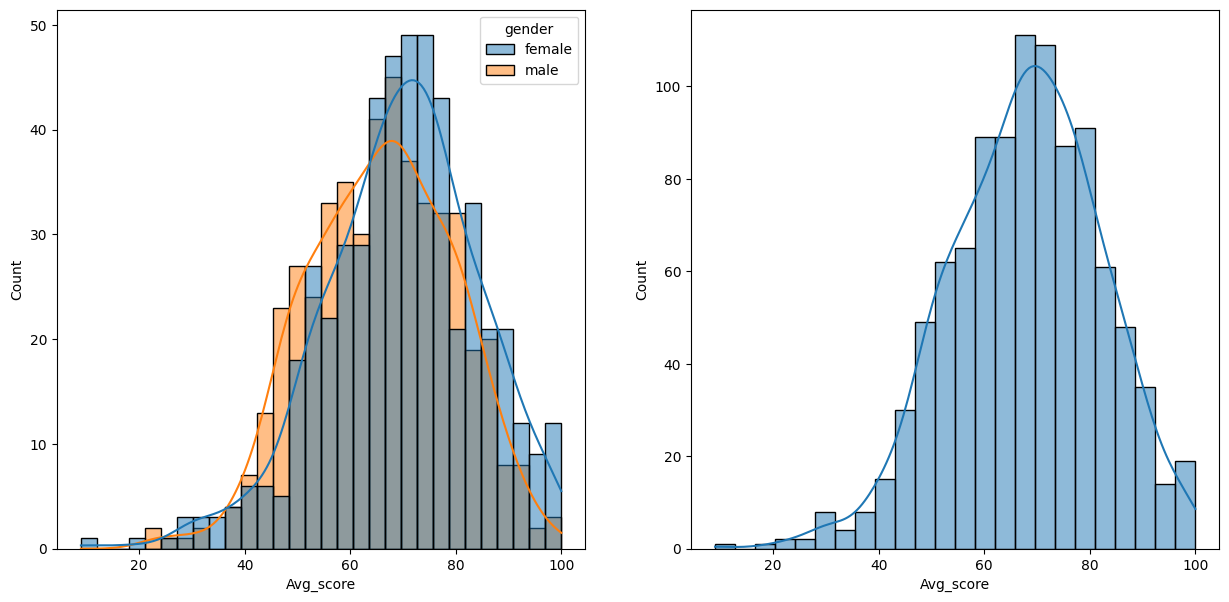

In [61]:
fig , axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(x='Avg_score' , data = df, bins = 30 , hue='gender',kde= True , color = 'g')
plt.subplot(1,2,2)
sns.histplot(x=df['Avg_score'] , data=df , kde = True )
plt.show()


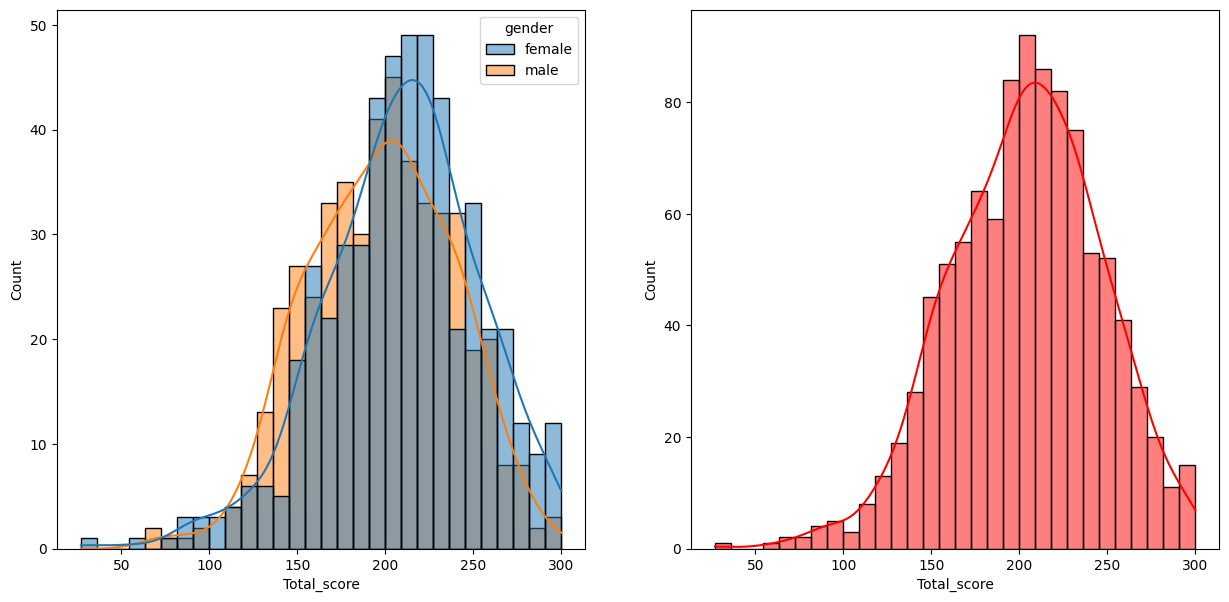

In [66]:
fig ,axs = plt.subplots(1,2,figsize = (15,7))
plt.subplot(1,2,1)
sns.histplot(x=df['Total_score'] ,data = df , bins = 30 , hue = df['gender'] , kde = True, color = 'g')
plt.subplot(1,2,2)
sns.histplot(data = df , x = df['Total_score'] , bins = 30,kde = True , color = 'r')
plt.show()

In [67]:
df.head(2
        )

,gender,race_ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_score,Avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


## insights 

- female have higher marks than male and also perform well.

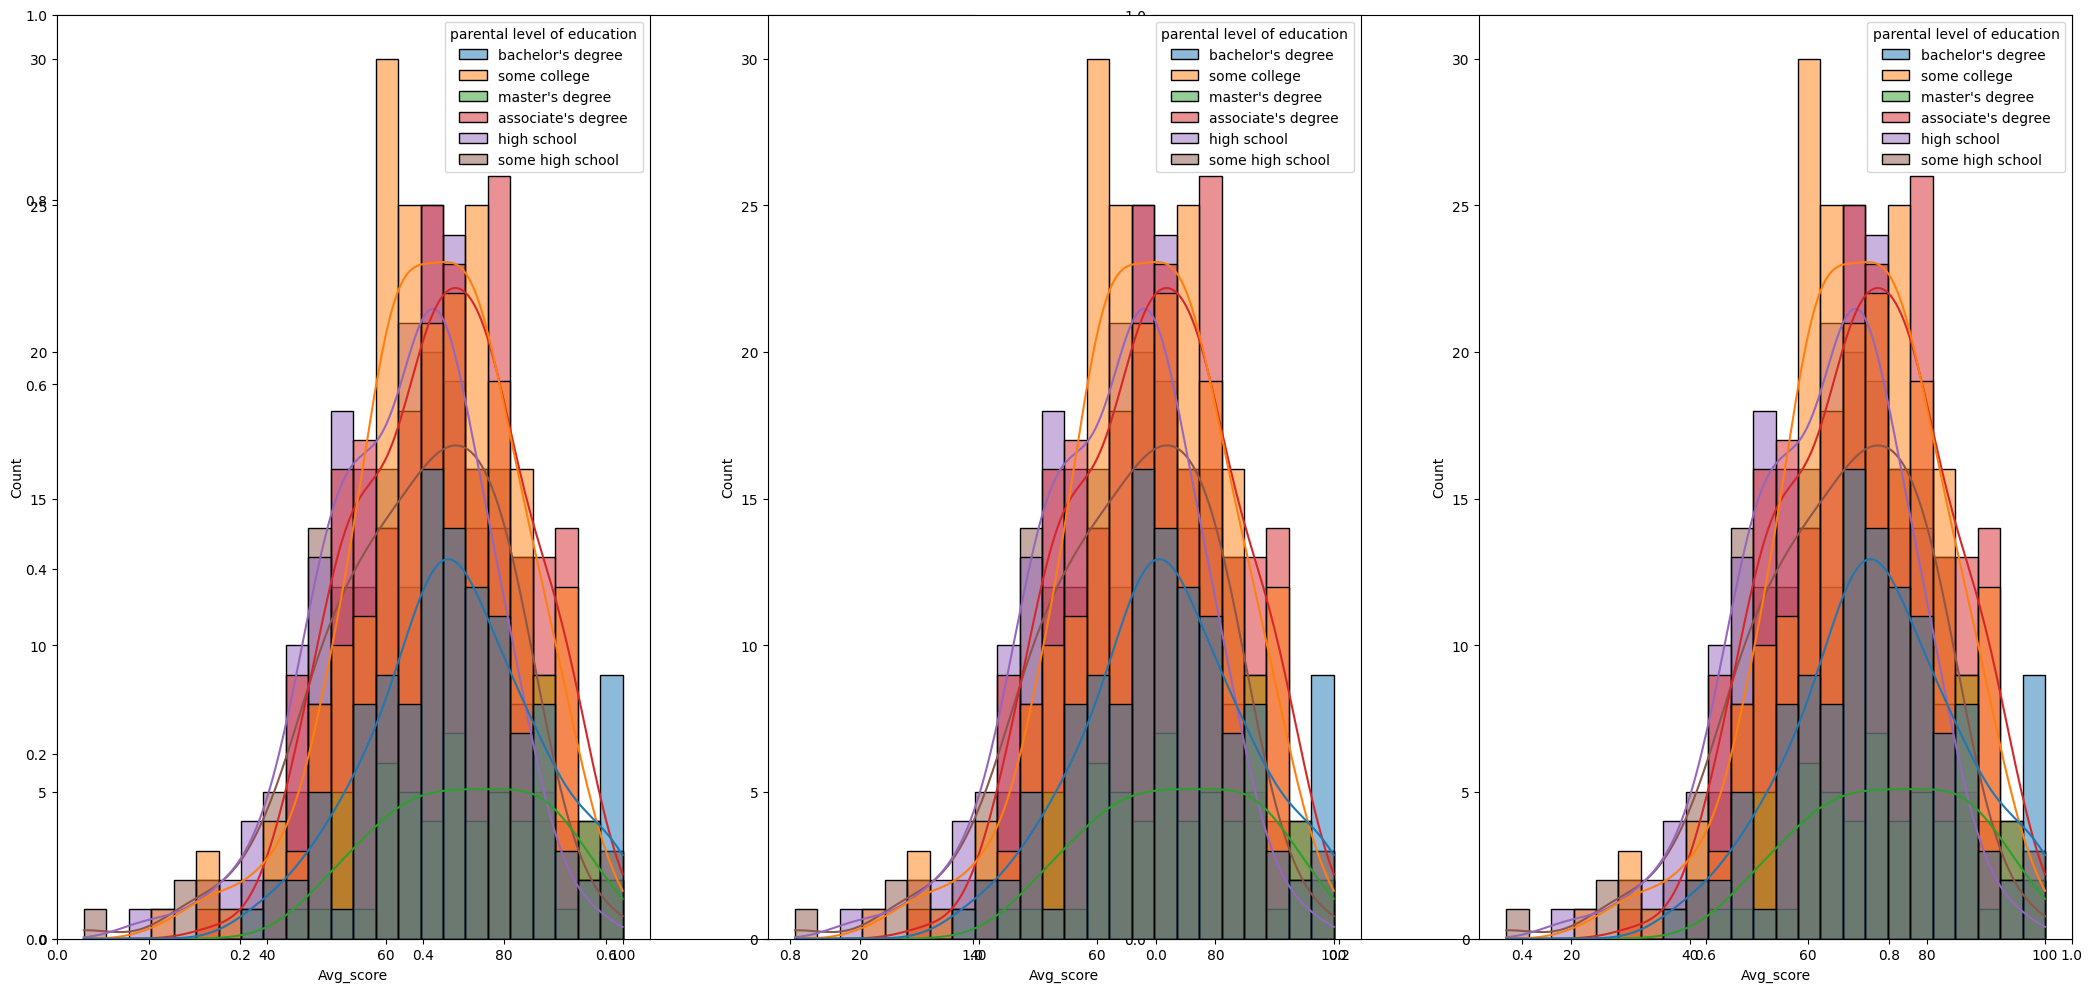

In [80]:
fig,axs = plt.subplots(1,2,figsize = (26,12))
plt.subplot(1,3,1)
sns.histplot(data = df, x = df['Avg_score'], kde = True,hue = df['parental level of education']  , color = 'r')
plt.subplot(1,3,2)
sns.histplot(data = df[df.gender=='male'], x = df['Avg_score'], kde = True , hue = df['parental level of education'] , color = 'g')
plt.subplot(1,3,3)
sns.histplot(data = df[df.gender=='female'] , x = df['Avg_score'],hue = df['parental level of education'], kde = True  , color = 'p')
plt.show()


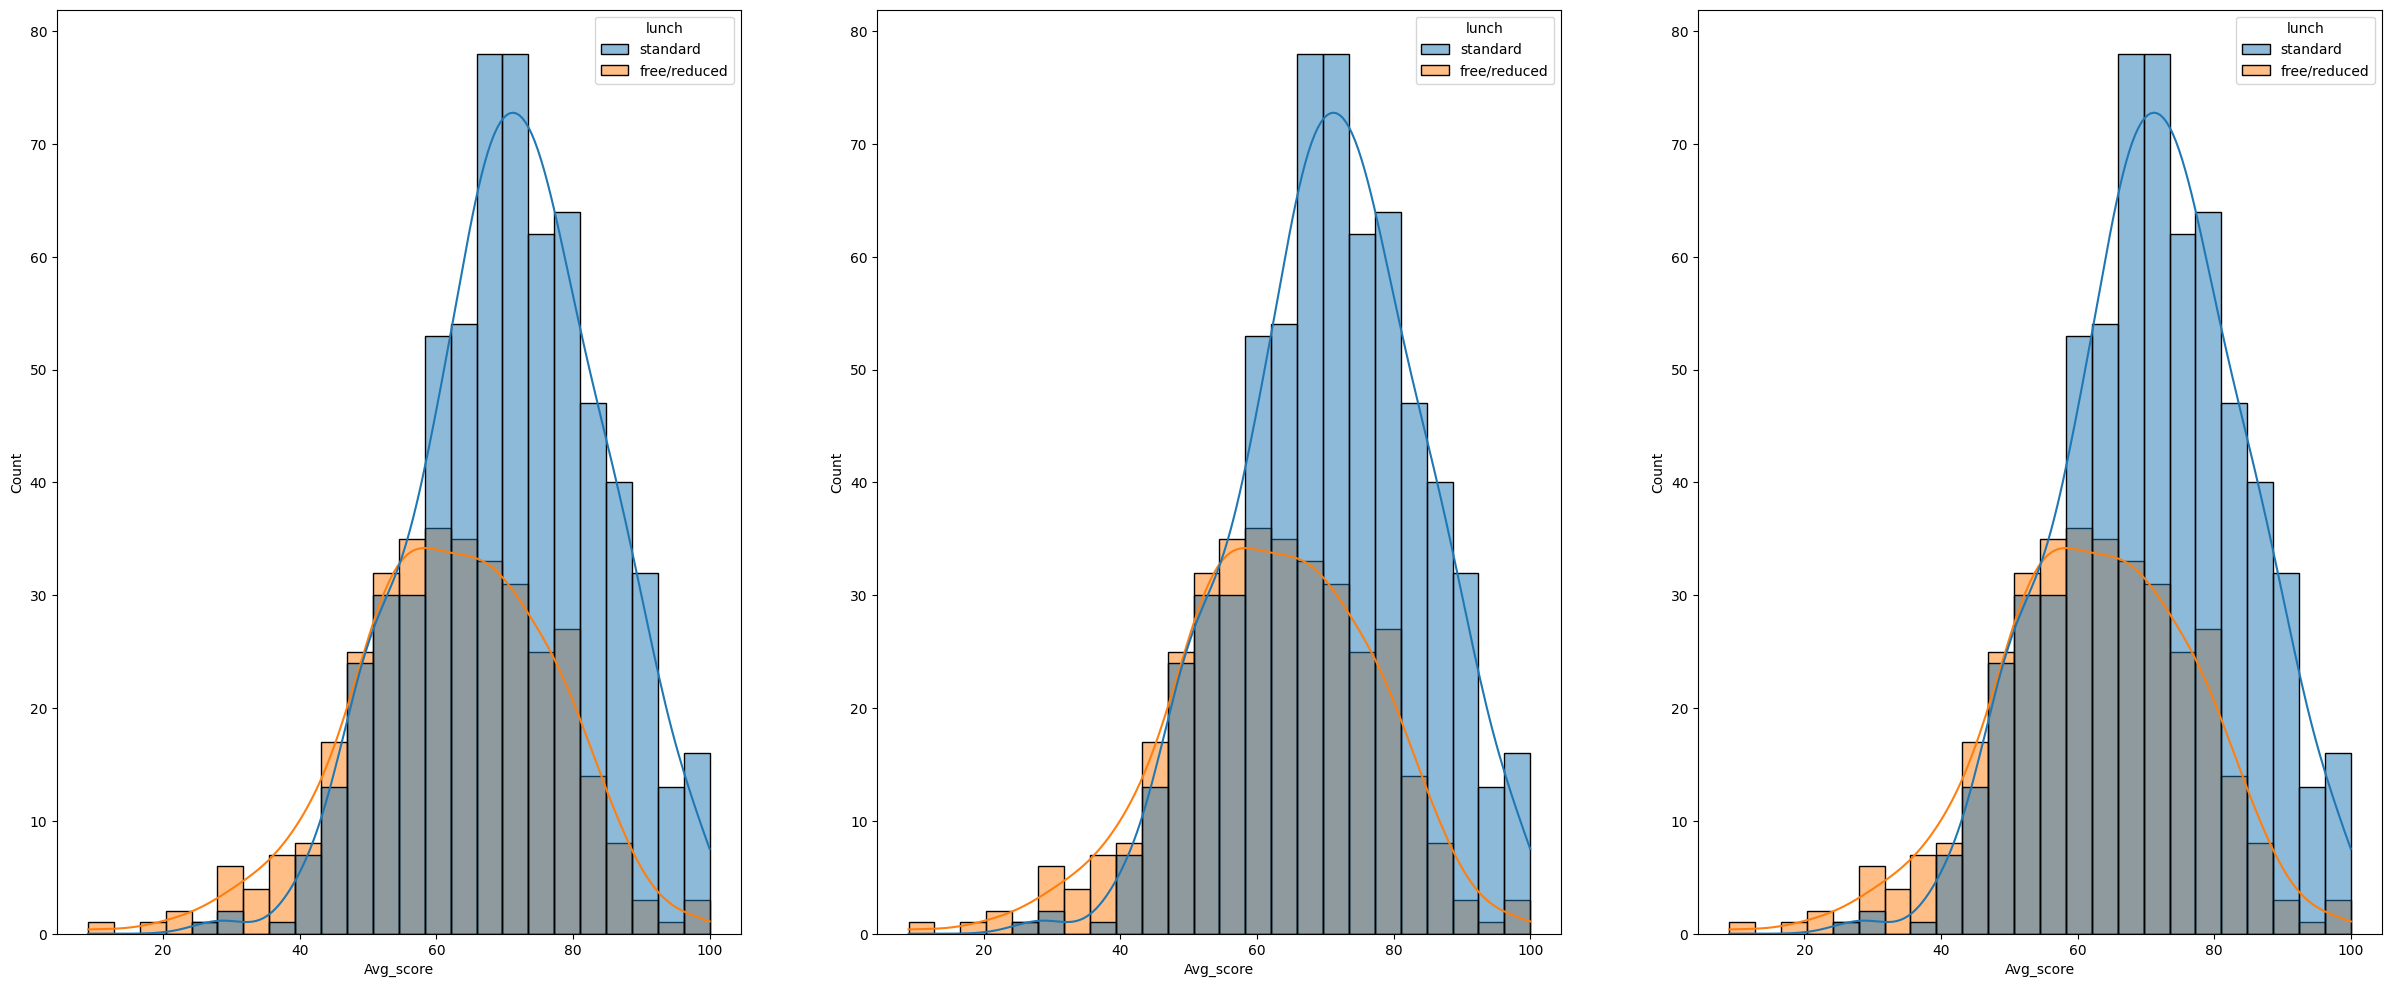

In [77]:
fig,axs = plt.subplots(1,3,figsize = (30
                                      ,12))
plt.subplot(1,3,1)
sns.histplot(data = df, x = df['Avg_score'], kde = True , hue = df['lunch'] , color = 'b')
plt.subplot(1,3,2)
sns.histplot(data = df[df.gender=='male'] , x = df['Avg_score'], kde = True , hue = df['lunch'] , color = 'b')
plt.subplot(1,3,3)
sns.histplot(data =df[df.gender=='female'] , x = df['Avg_score'], kde = True , hue = df['lunch'] , color = 'b')
plt.show()

## insights

- we observed that the standard lunch's category have a high avg_score
- standard lunch helps for getting high score whether it's male or female

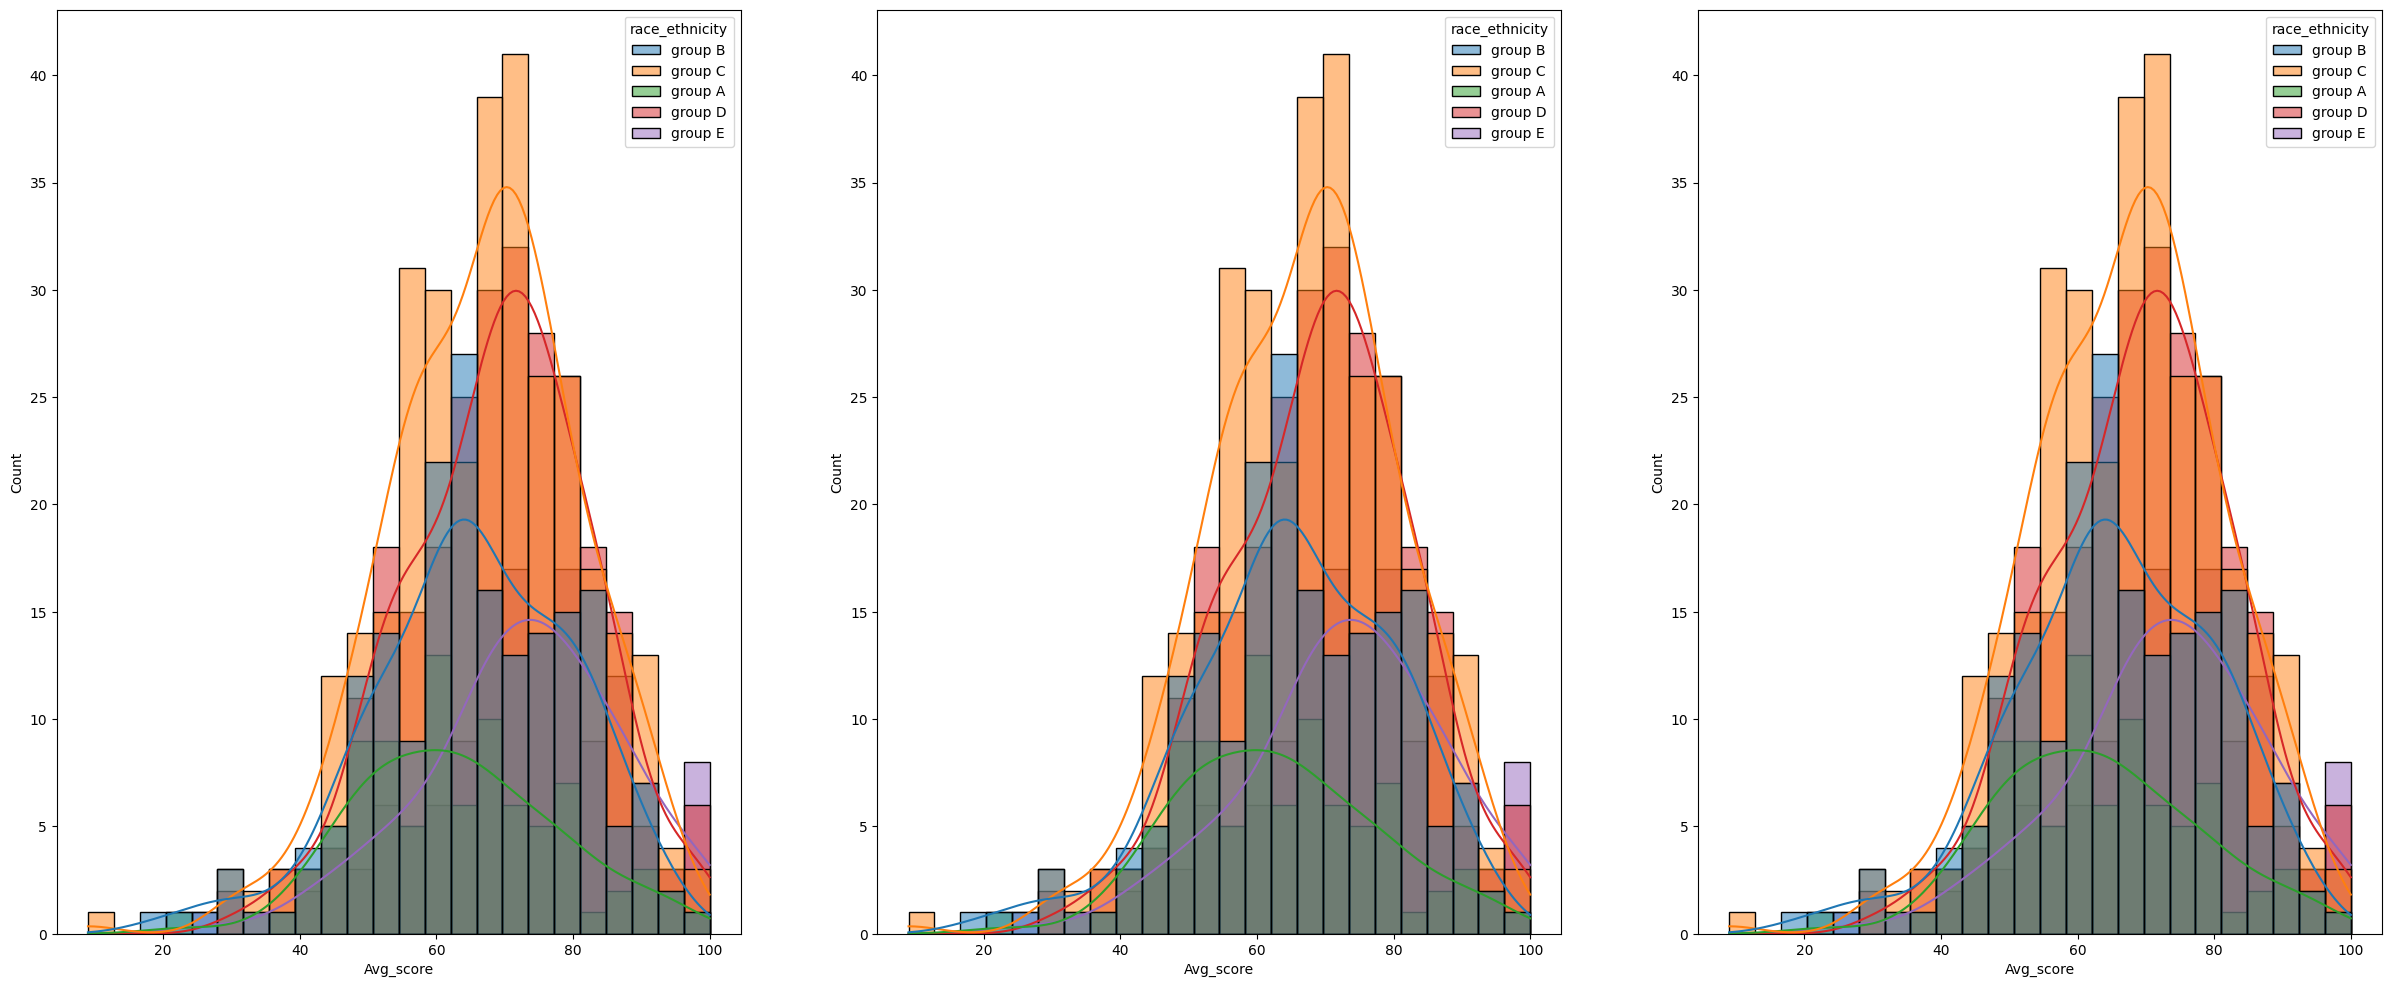

In [81]:
fig,axs = plt.subplots(1,3,figsize = (30
                                      ,12))
plt.subplot(1,3,1)
sns.histplot(data = df, x = df['Avg_score'], kde = True , hue = df['race_ethnicity'] , color = 'b')
plt.subplot(1,3,2)
sns.histplot(data = df[df.gender=='male'] , x = df['Avg_score'], kde = True , hue = df['race_ethnicity'] , color = 'b')
plt.subplot(1,3,3)
sns.histplot(data =df[df.gender=='female'] , x = df['Avg_score'], kde = True , hue = df['race_ethnicity'] , color = 'b')
plt.show()

## insights
- Group A , b and E tends to perform poorly in test exam
- Group c tends to perform well whether it's male or female

Full marks — Math: 7, Reading: 17, Writing: 14, All three: 3


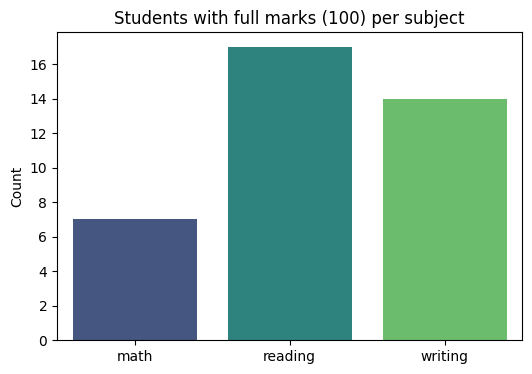

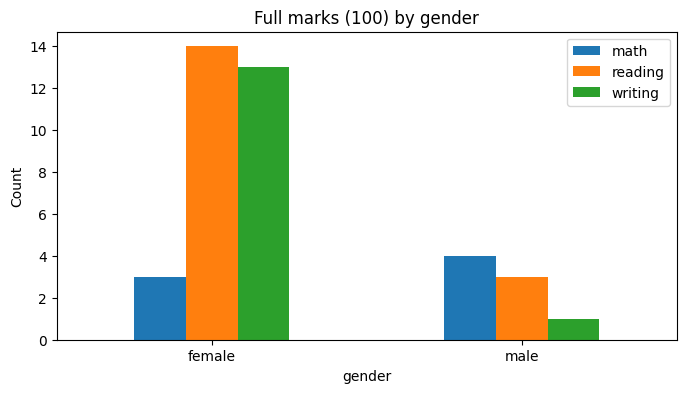

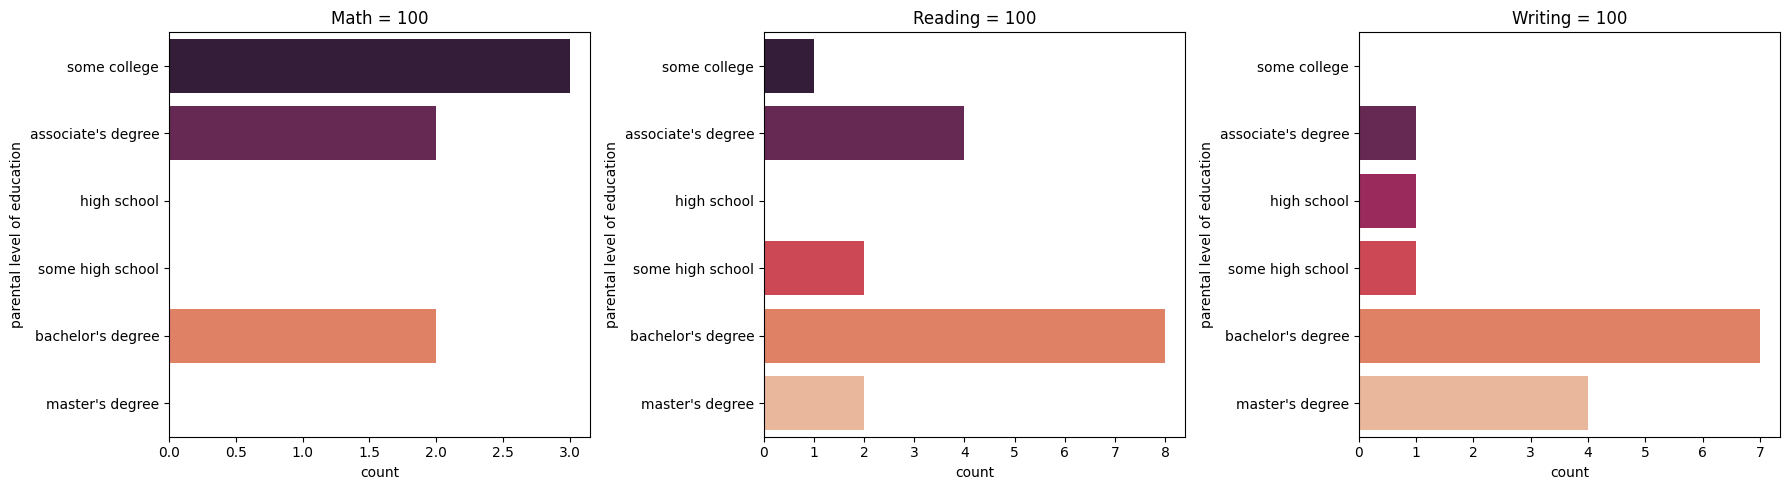

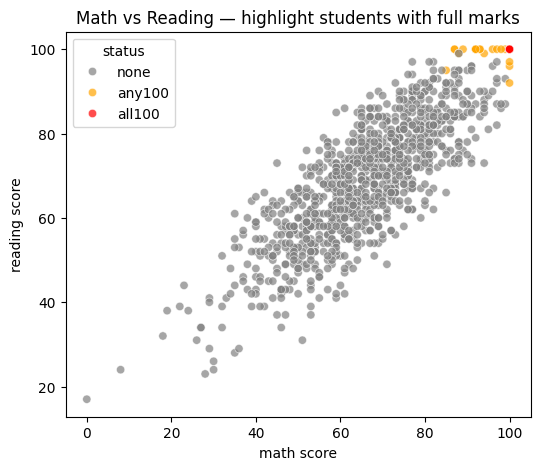

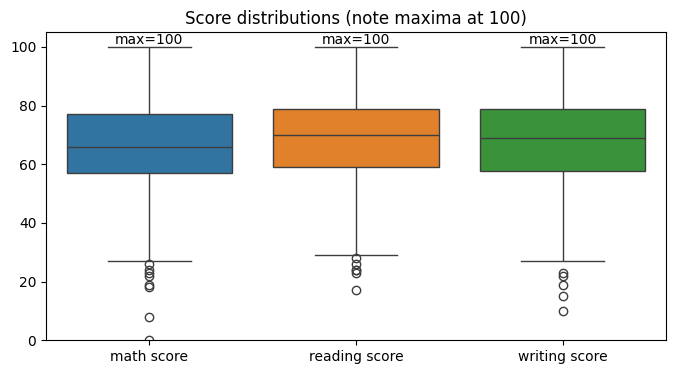

In [82]:
# ...existing code...
import matplotlib.pyplot as plt
import seaborn as sns

# counts
math_full = df[df['math score'] == 100].shape[0]
reading_full = df[df['reading score'] == 100].shape[0]
writing_full = df[df['writing score'] == 100].shape[0]
all_three_full = df[(df['math score'] == 100) & (df['reading score'] == 100) & (df['writing score'] == 100)].shape[0]

print(f"Full marks — Math: {math_full}, Reading: {reading_full}, Writing: {writing_full}, All three: {all_three_full}")

# 1) Overall barplot of full marks per subject
plt.figure(figsize=(6,4))
sns.barplot(x=['math','reading','writing'], y=[math_full, reading_full, writing_full], palette='viridis')
plt.title('Students with full marks (100) per subject')
plt.ylabel('Count')
plt.show()

# 2) Full-mark counts by gender
by_gender = pd.DataFrame({
    'math': df[df['math score'] == 100]['gender'].value_counts(),
    'reading': df[df['reading score'] == 100]['gender'].value_counts(),
    'writing': df[df['writing score'] == 100]['gender'].value_counts()
}).fillna(0).astype(int)
by_gender.plot(kind='bar', figsize=(8,4))
plt.title('Full marks (100) by gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# 3) Parental education distribution among full-mark students (one plot per subject)
subjects = ['math score', 'reading score', 'writing score']
fig, axs = plt.subplots(1, 3, figsize=(18,5))
for ax, sub in zip(axs, subjects):
    sns.countplot(data=df[df[sub] == 100], y='parental level of education',
                  order=df['parental level of education'].value_counts().index, ax=ax, palette='rocket')
    ax.set_title(f'{sub.replace(" score","").title()} = 100')
plt.tight_layout()
plt.show()

# 4) Scatter (math vs reading) highlighting students with any/all full marks
status = df.apply(lambda r: 'all100' if (r['math score']==100 and r['reading score']==100 and r['writing score']==100)
                  else ('any100' if (r[['math score','reading score','writing score']]==100).any() else 'none'), axis=1)
plt.figure(figsize=(6,5))
sns.scatterplot(x='math score', y='reading score', data=df, hue=status, palette={'all100':'red','any100':'orange','none':'gray'}, alpha=0.7)
plt.title('Math vs Reading — highlight students with full marks')
plt.legend(title='status')
plt.show()

# 5) Boxplots of score distributions and max annotation
plt.figure(figsize=(8,4))
sns.boxplot(data=df[['math score','reading score','writing score']])
plt.title('Score distributions (note maxima at 100)')
plt.ylim(0,105)
for i, col in enumerate(['math score','reading score','writing score']):
    plt.text(i, 101, 'max=100', ha='center')
plt.show()
# ...existing code...

math score: outliers=8, lower=27.00, upper=107.00
reading score: outliers=6, lower=29.00, upper=109.00
writing score: outliers=5, lower=25.88, upper=110.88
Total_score: outliers=6, lower=88.00, upper=320.00
Avg_score: outliers=6, lower=29.33, upper=106.67
Total rows flagged as outlier (IQR any column): 12


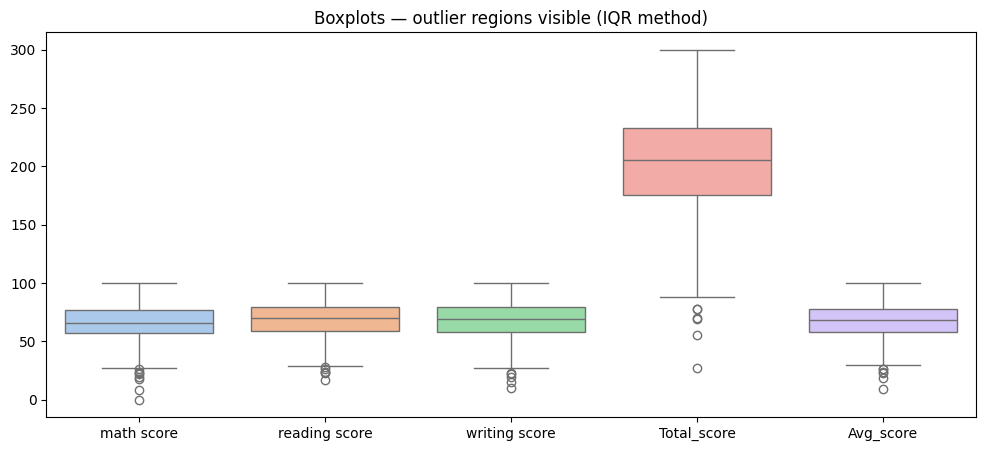

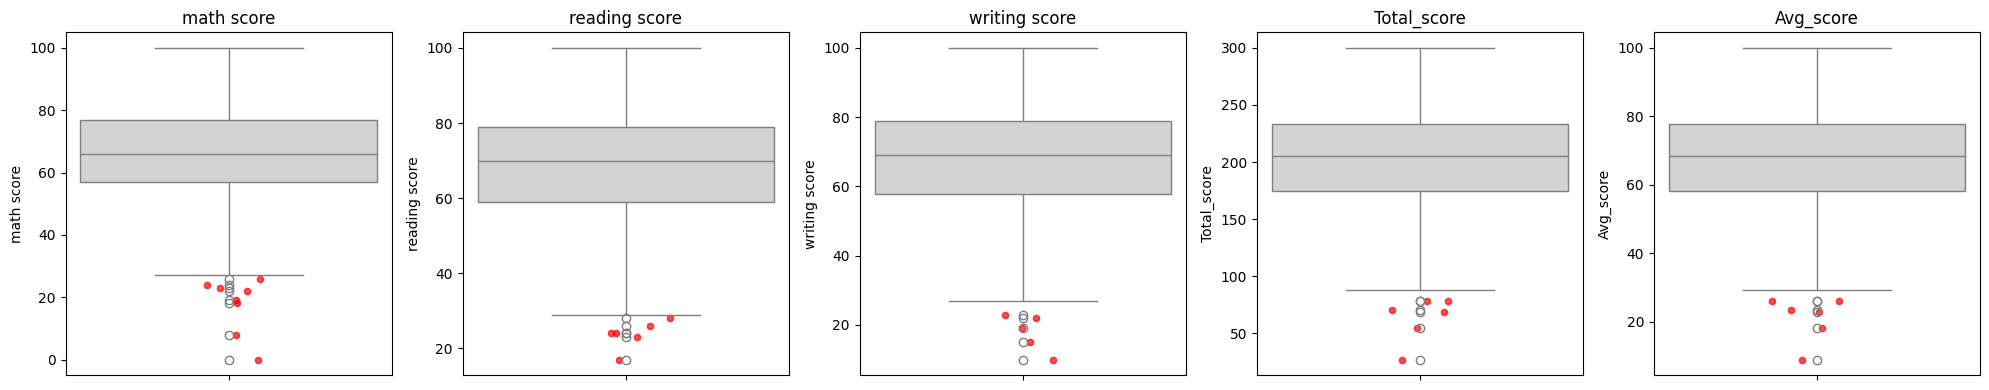

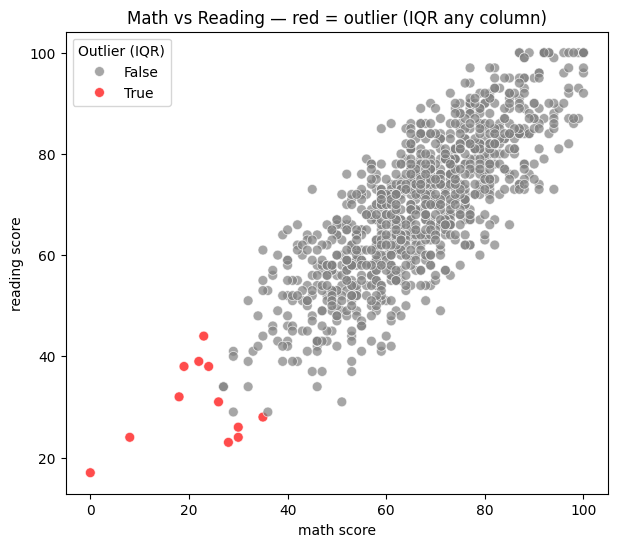

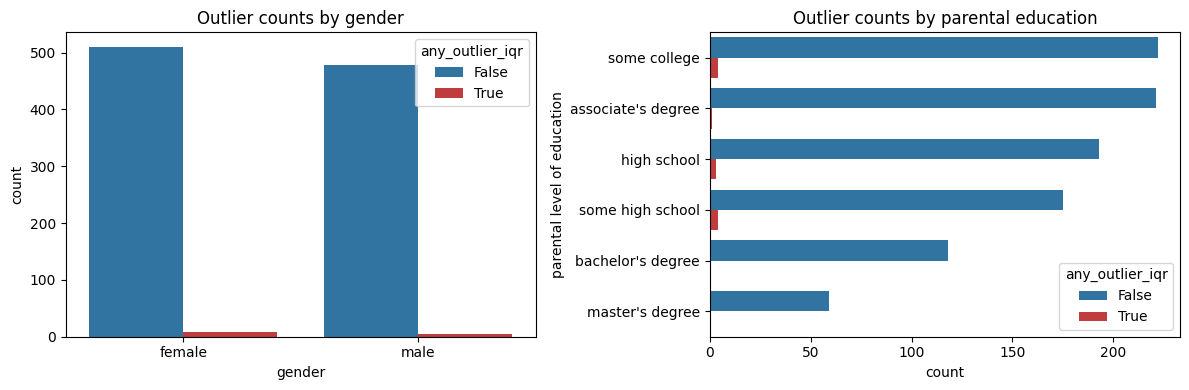

Top 15 rows by max absolute z-score (most extreme):


,gender,race_ethnicity,parental level of education,math score,reading score,writing score,Total_score,Avg_score,max_abs_z
59,female,group C,some high school,0,17,10,27,9.000000,4.358547
980,female,group B,high school,8,24,23,55,18.333333,3.830950
596,male,group B,high school,30,24,15,69,23.000000,3.491392
327,male,group A,some college,28,23,19,70,23.333333,3.228159
17,female,group B,some high school,18,32,28,78,26.000000,3.171453
787,female,group B,some college,19,38,32,89,29.666667,3.105504
76,male,group E,some high school,30,26,22,78,26.000000,3.030734
145,female,group C,some college,22,39,33,94,31.333333,2.907655
842,female,group B,high school,23,44,36,103,34.333333,2.841705
211,male,group C,some college,35,28,27,90,30.000000,2.819757


In [83]:
# ...existing code...
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# numeric columns to check
num_cols = ['math score','reading score','writing score','Total_score','Avg_score']

# IQR-based outlier detection per column
outlier_info = {}
for c in num_cols:
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (df[c] < lower) | (df[c] > upper)
    outlier_info[c] = mask
    print(f"{c}: outliers={mask.sum():d}, lower={lower:.2f}, upper={upper:.2f}")

# combine masks: student is outlier if any numeric column flagged
df['any_outlier_iqr'] = np.column_stack([outlier_info[c] for c in num_cols]).any(axis=1)
print(f"Total rows flagged as outlier (IQR any column): {df['any_outlier_iqr'].sum():d}")

# 1) Boxplots for numeric columns (quick visual)
plt.figure(figsize=(12,5))
sns.boxplot(data=df[num_cols], palette='pastel')
plt.title('Boxplots — outlier regions visible (IQR method)')
plt.show()

# 2) Individual boxplots with outlier points overlaid
fig, axs = plt.subplots(1, len(num_cols), figsize=(20,4), sharey=False)
for ax, col in zip(axs, num_cols):
    sns.boxplot(y=df[col], ax=ax, color='lightgray')
    # plot outlier points (IQR)
    oidx = df[outlier_info[col]].index
    ax.scatter(np.random.normal(0, 0.05, size=len(oidx)), df.loc[oidx, col], color='red', s=20, alpha=0.7)
    ax.set_title(col)
plt.tight_layout()
plt.show()

# 3) Scatter: math vs reading, highlight outliers
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='any_outlier_iqr',
                palette={False:'gray', True:'red'}, alpha=0.7, s=50)
plt.title('Math vs Reading — red = outlier (IQR any column)')
plt.legend(title='Outlier (IQR)')
plt.show()

# 4) Countplot of outlier flags by gender and parental education
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='gender', hue='any_outlier_iqr', palette=['tab:blue','tab:red'])
plt.title('Outlier counts by gender')
plt.subplot(1,2,2)
# show top parental categories if many
sns.countplot(data=df, y='parental level of education', hue='any_outlier_iqr',
              order=df['parental level of education'].value_counts().index, palette=['tab:blue','tab:red'])
plt.title('Outlier counts by parental education')
plt.tight_layout()
plt.show()

# 5) Table of most extreme outliers by z-score (across numeric cols)
z_scores = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()
df['max_abs_z'] = z_scores.abs().max(axis=1)
extreme = df.sort_values('max_abs_z', ascending=False).head(15)[['gender','race_ethnicity','parental level of education',
                                                               'math score','reading score','writing score','Total_score','Avg_score','max_abs_z']]
print("Top 15 rows by max absolute z-score (most extreme):")
display(extreme)
# ...existing code...

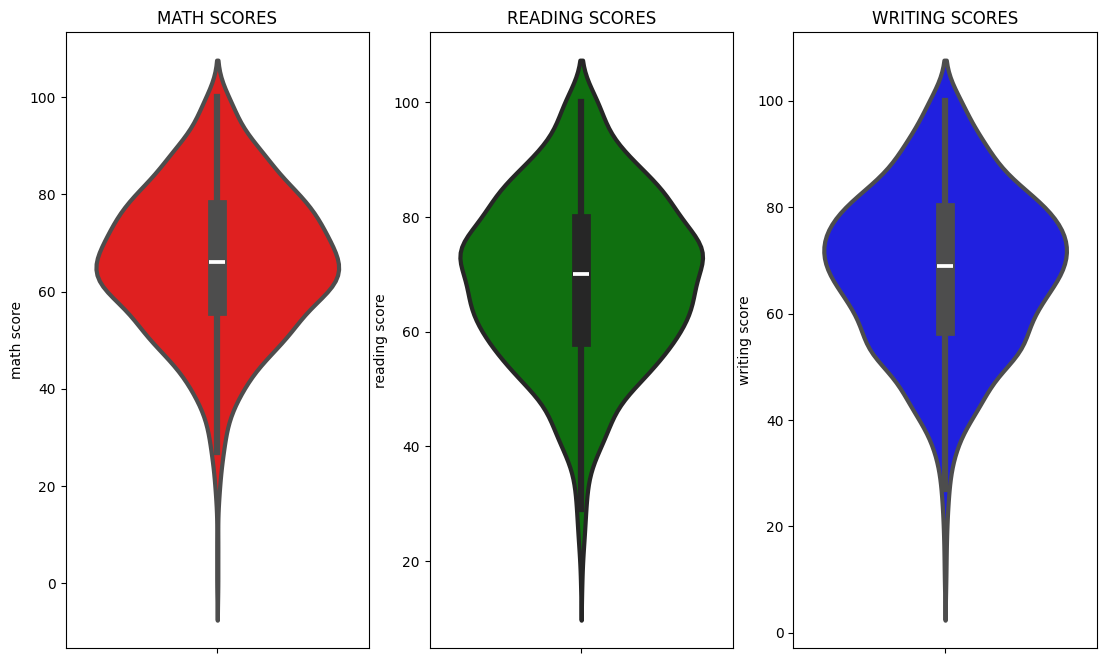

In [84]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

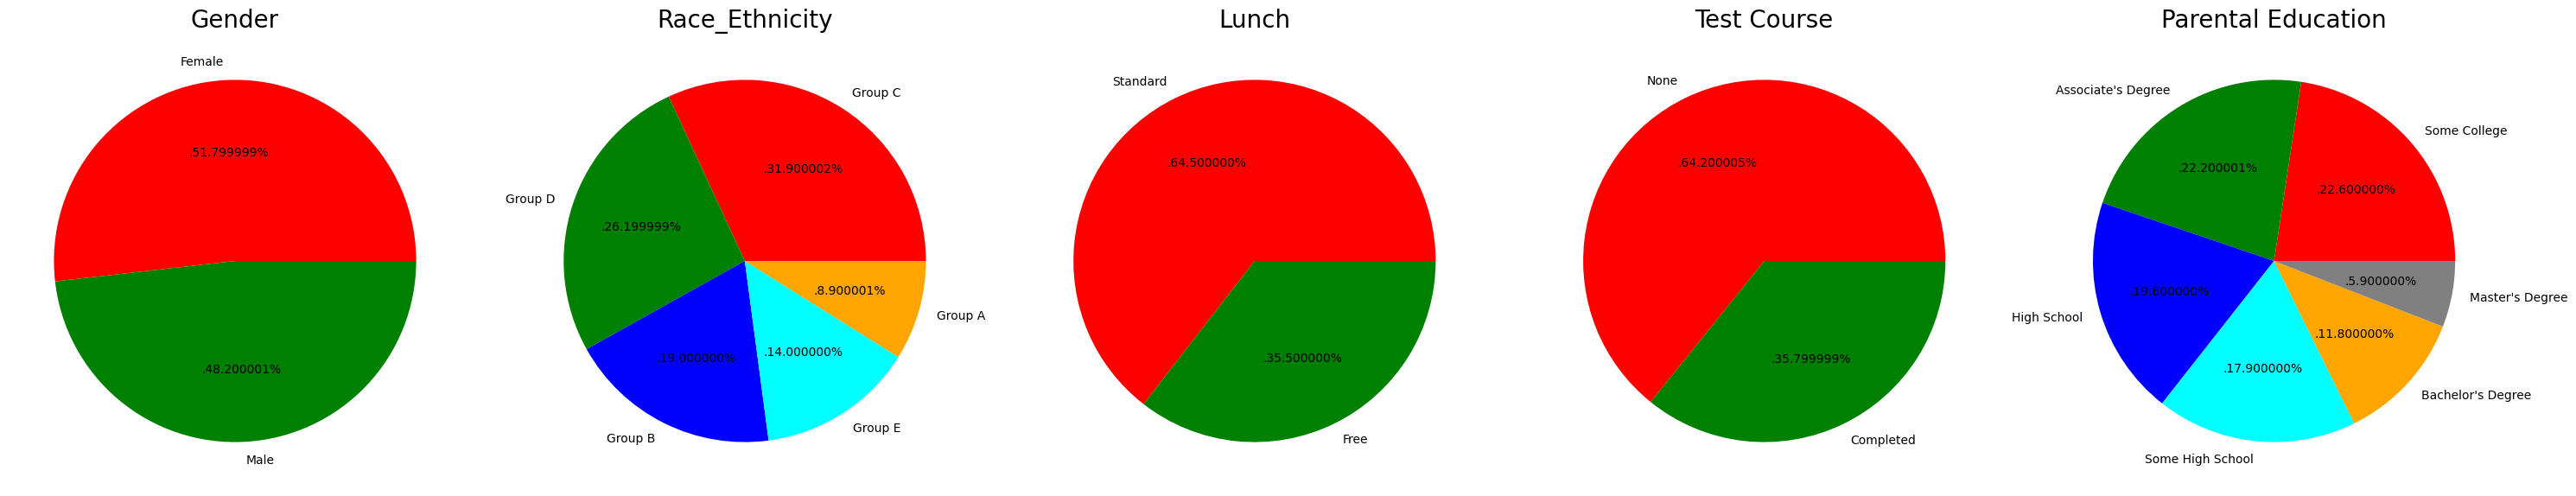

In [88]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

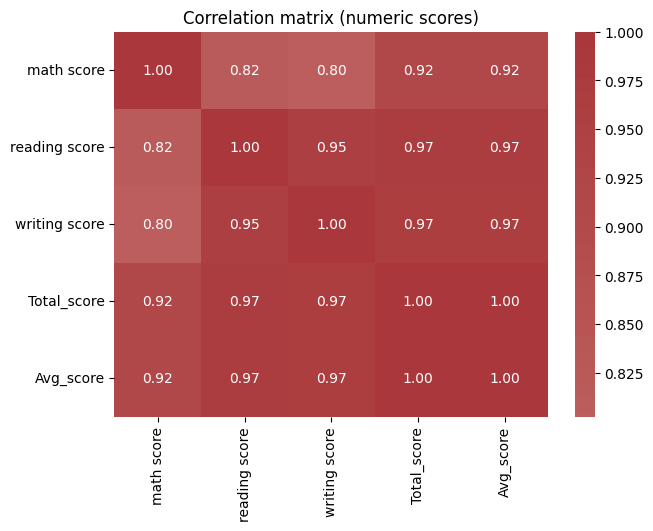

Pairwise correlations (sorted):


Total_score    Avg_score        1.000000
reading score  Total_score      0.970331
writing score  Total_score      0.965667
               Avg_score        0.965667
reading score  writing score    0.954598
math score     Avg_score        0.918746
               Total_score      0.918746
               reading score    0.817580
               writing score    0.802642
dtype: float64

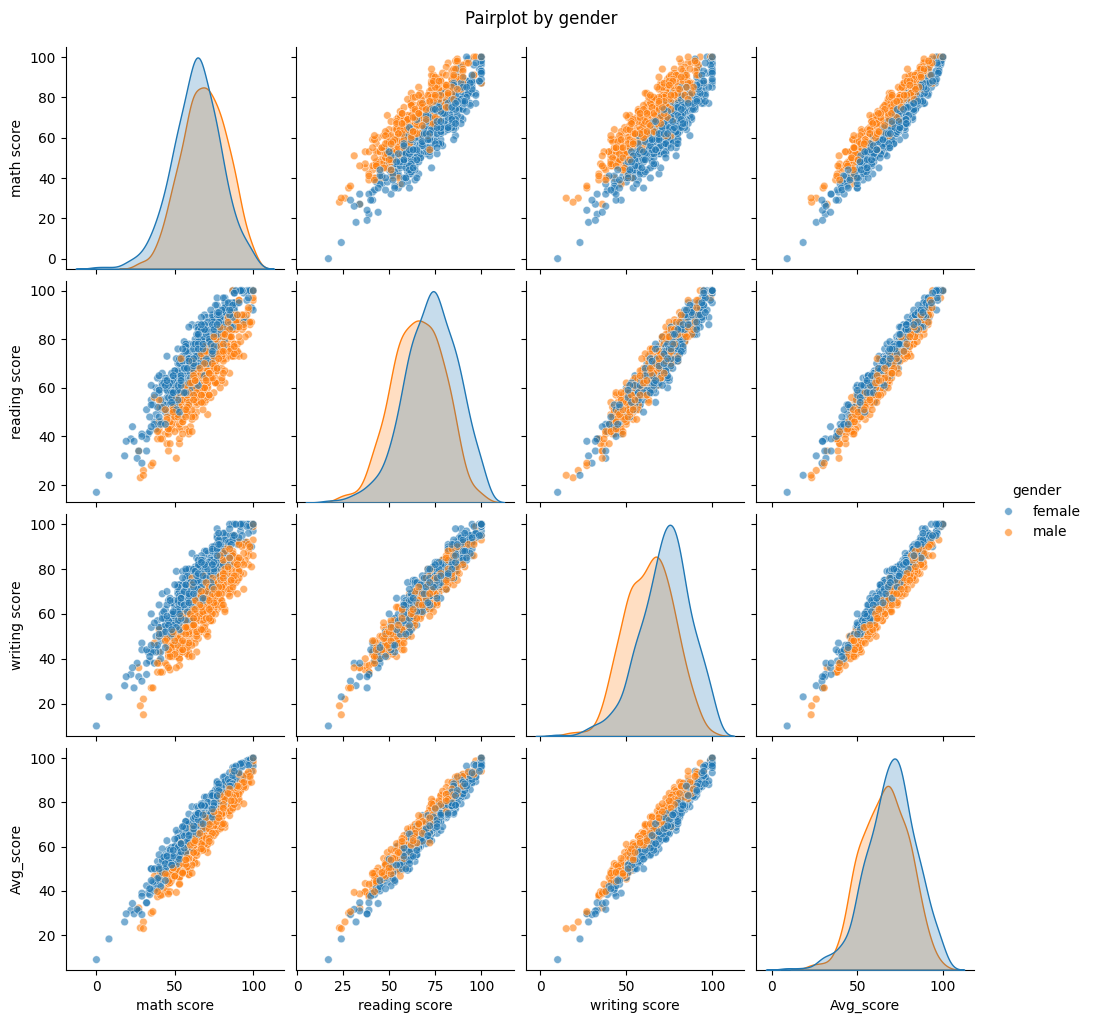

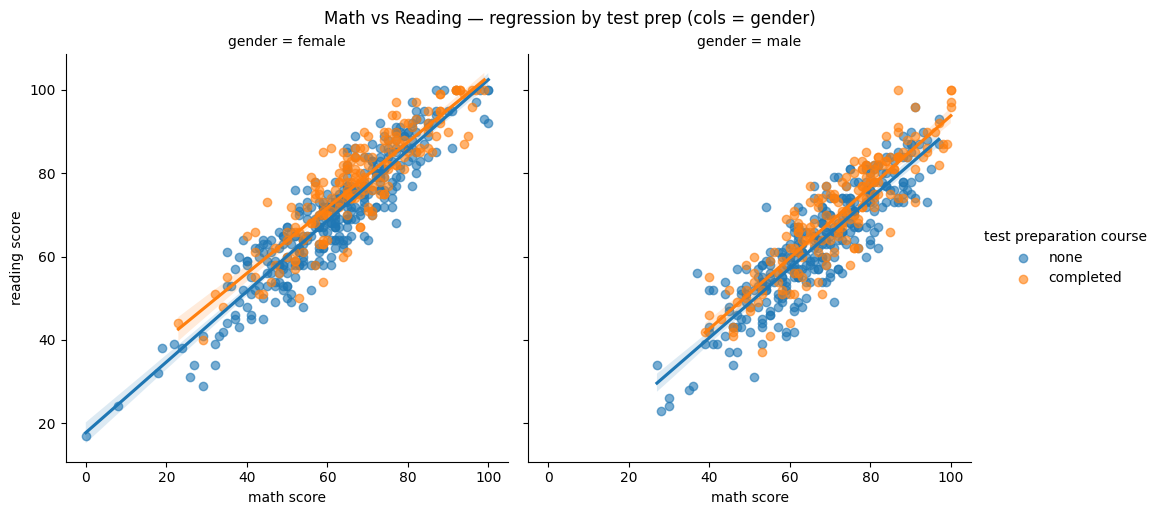

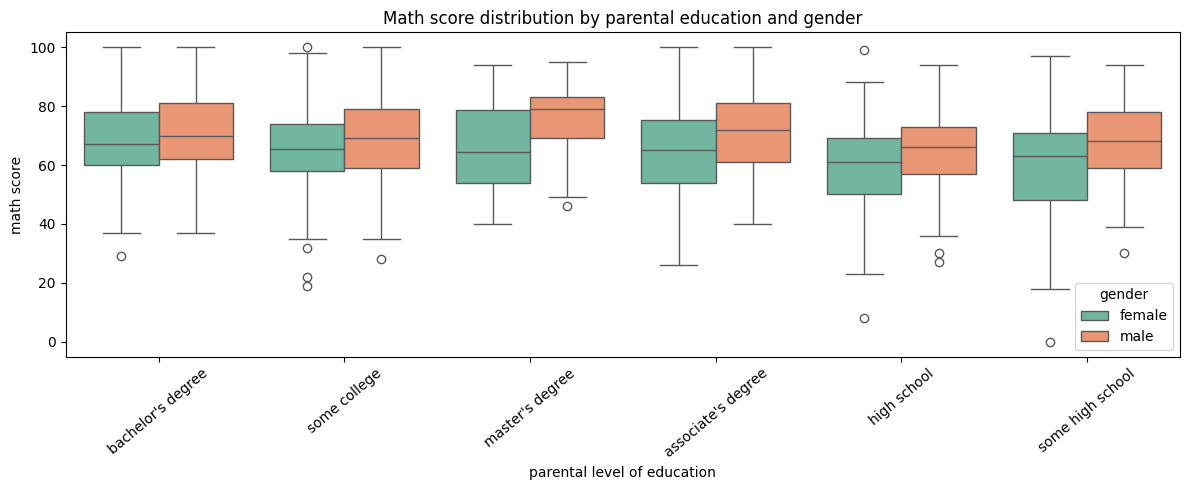

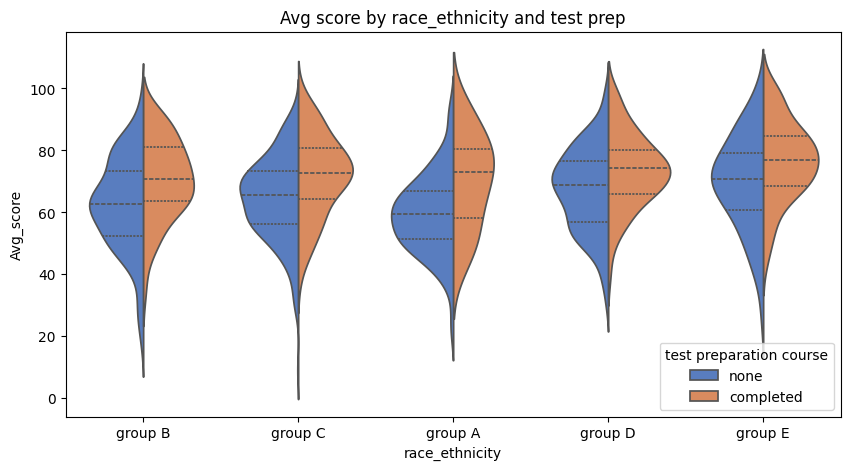

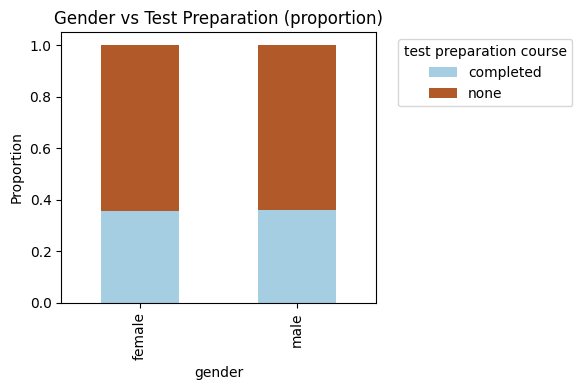

Chi-square test (gender vs test preparation): p-value = 0.9008


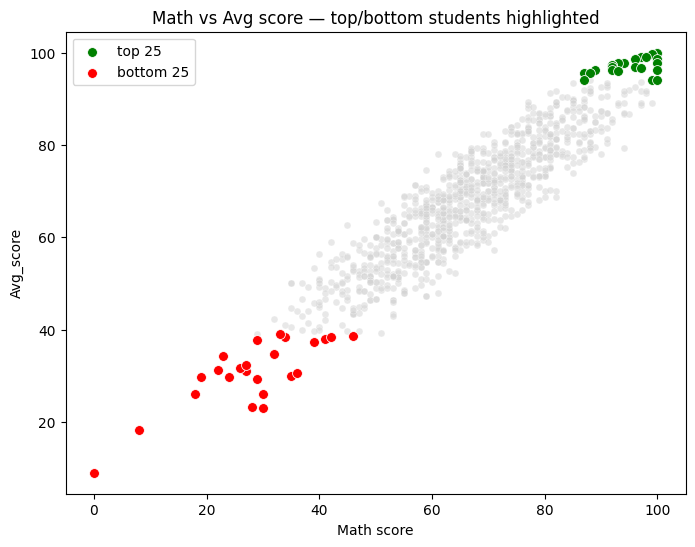

In [91]:
# ...existing code...

# ---- BIVARIATE ANALYSIS (add new cells below) ----
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# numeric cols we'll analyze
num_cols = ['math score', 'reading score', 'writing score', 'Total_score', 'Avg_score']

# 1) Correlation matrix + heatmap
corr = df[num_cols].corr()
plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation matrix (numeric scores)')
plt.show()

# Print strongest correlations
print("Pairwise correlations (sorted):")
pairs = corr.unstack().drop_duplicates()
pairs = pairs[pairs.index.map(lambda t: t[0] != t[1])].sort_values(ascending=False)
display(pairs.head(10))

# 2) Pairplot colored by gender (quick bivariate overview)
sns.pairplot(df[['math score','reading score','writing score','Avg_score','gender']], hue='gender',
             diag_kind='kde', plot_kws={'alpha':0.6, 's':30})
plt.suptitle('Pairplot by gender', y=1.02)
plt.show()

# 3) Scatter + regression (math vs reading) — split by test preparation and gender
sns.lmplot(x='math score', y='reading score', data=df, hue='test preparation course',
           col='gender', height=5, aspect=1, scatter_kws={'alpha':0.6})
plt.suptitle('Math vs Reading — regression by test prep (cols = gender)', y=1.02)
plt.show()

# 4) Boxplots: score distributions by parental education and gender
plt.figure(figsize=(12,5))
sns.boxplot(x='parental level of education', y='math score', hue='gender', data=df, palette='Set2')
plt.xticks(rotation=40)
plt.title('Math score distribution by parental education and gender')
plt.tight_layout()
plt.show()

# 5) Violin: Avg_score by race_ethnicity, split by test preparation (two-level hue)
plt.figure(figsize=(10,5))
sns.violinplot(x='race_ethnicity', y='Avg_score', hue='test preparation course',
               data=df, split=True, inner='quartile', palette='muted')
plt.title('Avg score by race_ethnicity and test prep')
plt.show()

# 6) Categorical vs categorical: gender vs test preparation (stacked bar + chi-square)
ct = pd.crosstab(df['gender'], df['test preparation course'])
ct_norm = pd.crosstab(df['gender'], df['test preparation course'], normalize='index')

# stacked bar (proportion)
ct_norm.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Paired')
plt.ylabel('Proportion')
plt.title('Gender vs Test Preparation (proportion)')
plt.legend(title='test preparation course', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

# chi-square test for independence
chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi-square test (gender vs test preparation): p-value = {p:.4f}")

# 7) Summary scatter highlighting top/bottom Avg_score students
top = df.nlargest(25, 'Avg_score')
bottom = df.nsmallest(25, 'Avg_score')
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='math score', y='Avg_score', color='lightgray', alpha=0.5, s=25)
sns.scatterplot(data=top, x='math score', y='Avg_score', color='green', s=50, label='top 25')
sns.scatterplot(data=bottom, x='math score', y='Avg_score', color='red', s=50, label='bottom 25')
plt.xlabel('Math score')
plt.title('Math vs Avg score — top/bottom students highlighted')
plt.legend()
plt.show()

# ...existing code...

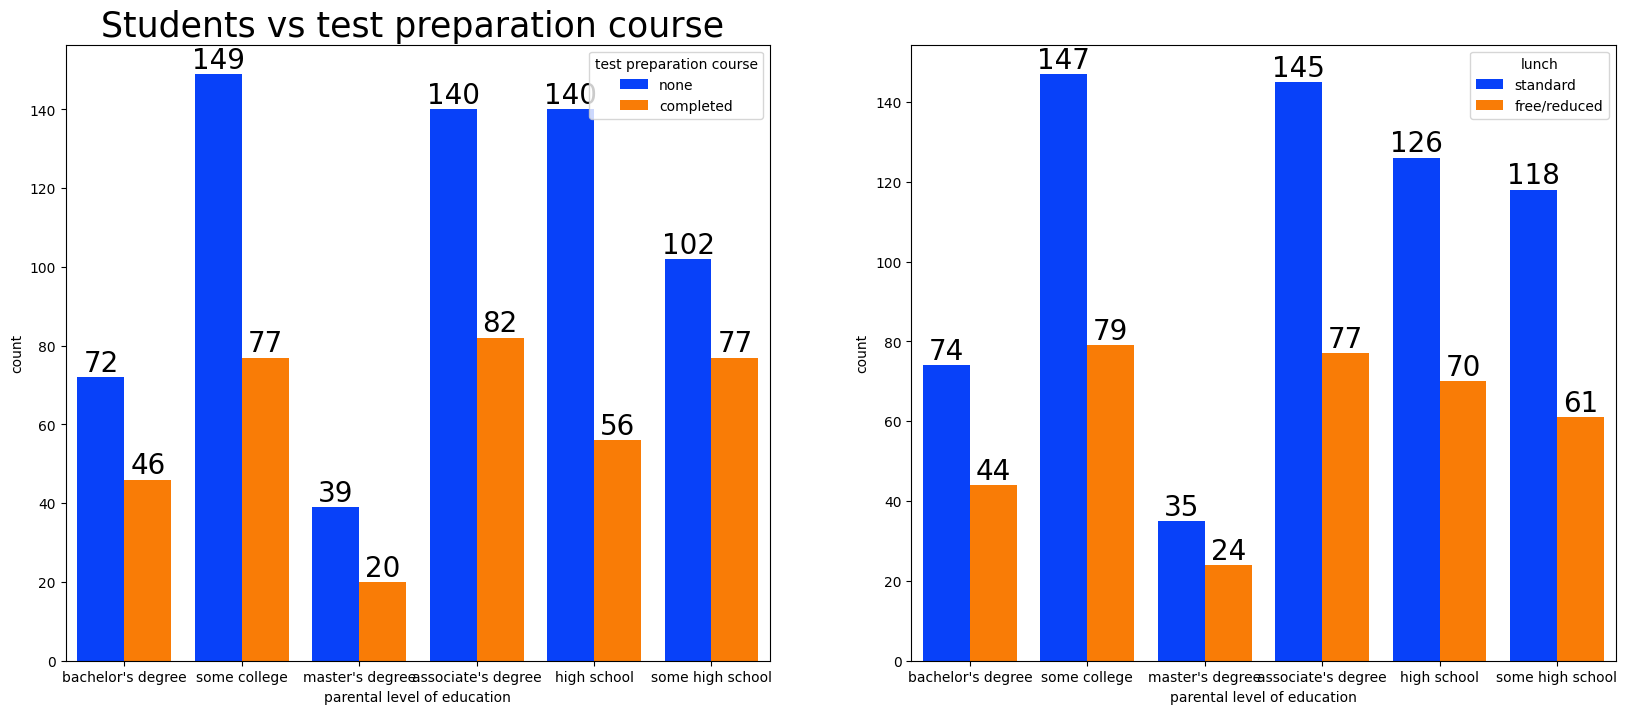

In [92]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

<Axes: xlabel='lunch', ylabel='writing score'>

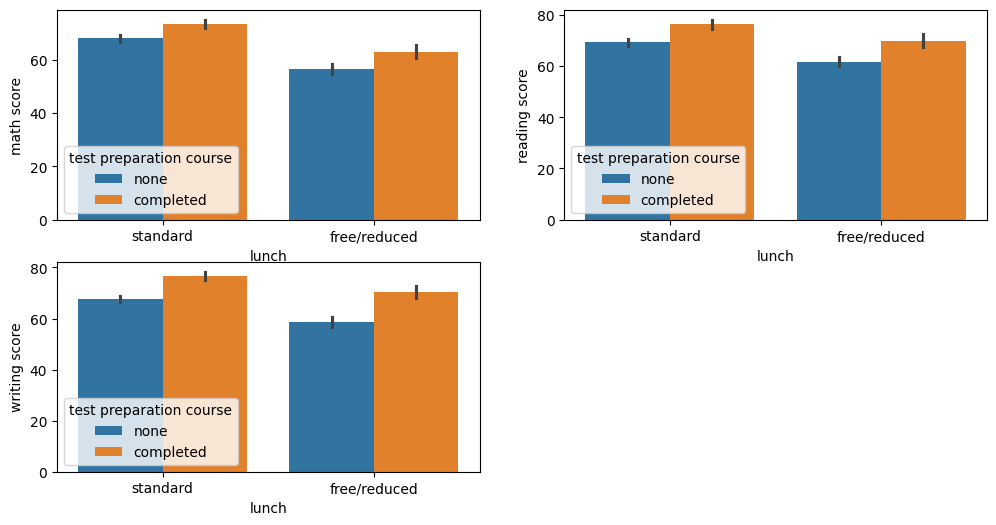

In [93]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

##  
- students who completed his course , they getting higher score in every subjects

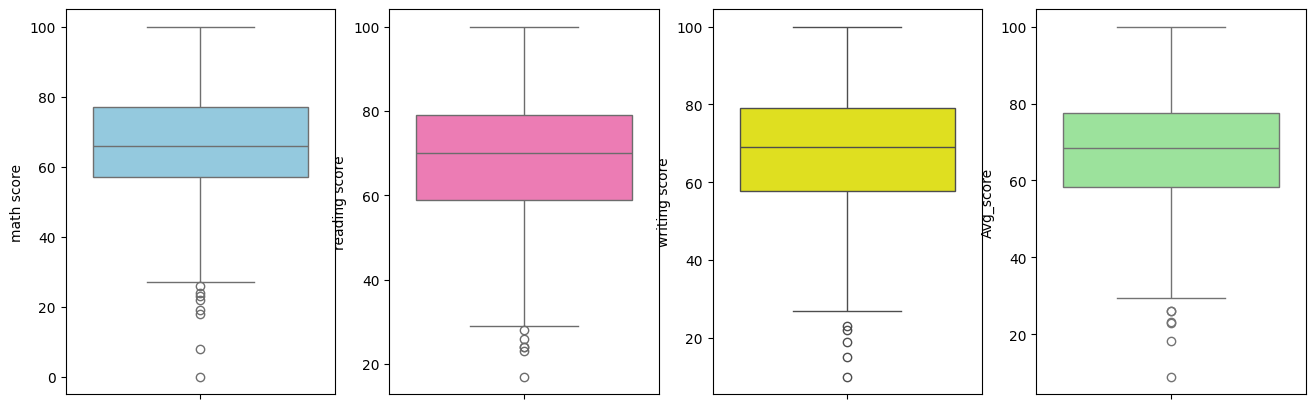

In [95]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Avg_score'],color='lightgreen')
plt.show()

## insights
### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.
